No. of Instances where script successfully executed : 7834
No. of Instances with sensitive token stored in clear text in tracked files : 860


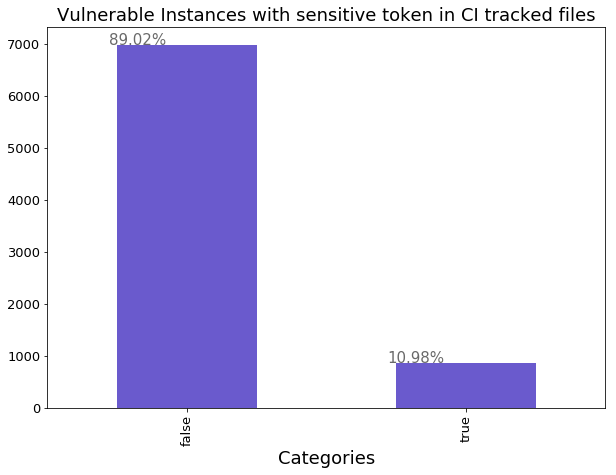

In [217]:
import pandas

def parse_data(df):
    columns=['Instance_Name','glide.discovery.enable_file_tracking', 'Token_Found', 'Which_Token', 'No_Of_Tracked_Files',
            'Related_CI', 'CI_Class_Name', 'File_Name','First_File_W_Match']

    rows_list = []

    for row in df.index:
        dict1 = {}
        rows = 0
        file_tracking_enabled = ''
        Token_Found = ''
        Which_Token = ''
        No_Of_Tracked_Files = ''
        Related_CI = ''
        CI_Class_Name = ''
        File_Name = ''
        First_File_W_Match = ''
        Instance_Name = df["u_instance_name"][row]
        payload = df["u_audit_payload"][row]

        if "Sorry" not in payload:
            payload_elem = payload.split(",")
            for i in range(len(payload_elem)):
                if i==0:
                    file_tracking_enabled = payload_elem[i].split("::")[1].strip()
                elif i==1:
                    Token_Found = payload_elem[i].split("::")[1].strip()
                elif i==2:
                    Which_Token = payload_elem[i].split("::")[1].strip()
                elif i==3:
                    No_Of_Tracked_Files = payload_elem[i].split("::")[1].strip()
                elif i==4:
                    Related_CI = payload_elem[i].split("::")[1].strip()
                elif i==5:
                    CI_Class_Name = payload_elem[i].split("::")[1].strip()
                elif i==6:
                    File_Name = payload_elem[i].split("::")[1].strip()
                elif i==7:
                    First_File_W_Match = payload_elem[i].split("::")[1].strip()
        if (Token_Found=='true') | (Token_Found=='false'):
            dict1.update({'Instance_Name' : Instance_Name , 'glide.discovery.enable_file_tracking' : file_tracking_enabled, 'Token_Found': Token_Found, 'Which_Token' : Which_Token, 'No_Of_Tracked_Files' : No_Of_Tracked_Files, 'Related_CI': Related_CI, 'CI_Class_Name' : CI_Class_Name, 'File_Name' : File_Name, 'First_File_W_Match' : First_File_W_Match})
            rows_list.append(dict1)
    return pandas.DataFrame(rows_list, columns=columns)

def drawchart(df, field, title, label, kind):
    ax = df[field].value_counts().plot(kind=kind, figsize=(10,7),
                                        color="slateblue", fontsize=13)
    ax.set_alpha(0.8)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(label, fontsize=18);

    totals = []
    if kind == 'bar':
        for i in ax.patches:
            totals.append(i.get_height())
    
    elif kind == 'barh':
        for i in ax.patches:
            totals.append(i.get_width())

    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    if kind == 'bar':
        for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.text(i.get_x()-.03, i.get_height()+.5, \
                    str(round(float(i.get_height())/float(total)*100,2))+'%', fontsize=15,
                        color='dimgrey')
    elif kind == 'barh':
        for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
            ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(float(i.get_width())/float(total)*100, 2))+'%', fontsize=15,
                color='dimgrey')
    
df1 = pandas.DataFrame(pandas.read_csv('Script_output_26thMarch.csv'), columns = ['u_instance_name', 'u_audit_payload', 'u_audit_state'])

state_completed = df1['u_audit_state'] == "Completed"
Empty_Payload = df1['u_audit_payload'] != "Empty Payload"
Empty_field = df1['u_audit_payload'] != ""
df2 = df1[state_completed & Empty_Payload & Empty_field]

df2.to_excel('Successfully_completed.xlsx')
df = parse_data(df2)

drawchart(df, 'Token_Found', "Vulnerable Instances with sensitive token in CI tracked files", "Categories",'bar')

token_found = df['Token_Found'] == 'true'
token_not_found = df['Token_Found'] == 'false'
property_enabled = df['glide.discovery.enable_file_tracking'] == 'true'
#How many instances have token found
df_token_found = df[token_found]
df_token_not_found = df[token_not_found]
df_token_found.to_excel("Vulnerable_Instances.xlsx","Vulnerable Instances")
df_token_not_found.to_excel("Safe_Instances.xlsx","Safe Instances")
#df_token_found.value_counts()
total = (len(df_token_found) +len(df_token_not_found))
print ('No. of Instances where script successfully executed : '+str(total))
print ('No. of Instances with sensitive token stored in clear text in tracked files : '+str(len(df_token_found)))

Which_Token
key                63
keystorepass       16
password          526
pin               130
publickeytoken    104
secret              3
token              18
Name: Instance_Name, dtype: int64


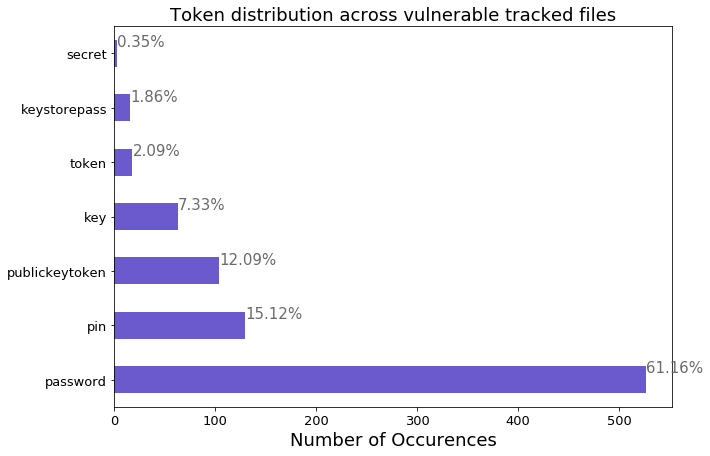

In [218]:
#Token distribution 
token_distribution = df_token_found.groupby('Which_Token')['Instance_Name'].nunique()
print token_distribution
token_distribution.to_excel("Token_distribution.xlsx", "Token Distribution")
drawchart(df_token_found, 'Which_Token', "Token distribution across vulnerable tracked files", "Number of Occurences",'barh')


In [220]:
# Statistics around No. of tracked files and no. of attemt before first token found
df_noOfFile_attempt = df_token_found[['Instance_Name', 'No_Of_Tracked_Files', 'First_File_W_Match']]
df_noOfFile_attempt.to_excel("No_of_tracked_files_vs_1st_Match.xlsx","No of Trckd Fle Vs frst mtch")
print df_noOfFile_attempt

                Instance_Name No_Of_Tracked_Files First_File_W_Match
5              grupoboticario                  49                 33
11                     suncor                  31                  1
18                      cadsh               10701                  1
22                 autonation                6288                  1
28                   thecrick                   3                  1
32                       ualr                1388                  1
39                      wind3                  29                  1
42                       rbko               19255                  1
47               republicbank                2819                  2
59                      cisco              308389                  1
73                       mcom                  74                  6
82                  metoffice                3189                  1
103                      chep                5695                  1
112            hitachivantara     

In [221]:
# Statistics around CI_Type and class name and file name
df_ci_typpe_corelation = df_token_found[['Instance_Name', 'Which_Token', 'CI_Class_Name', 'File_Name']]
df_ci_class_not_empty = df_ci_typpe_corelation['CI_Class_Name'] != ""
df_ci_typpe_corelation = df_ci_typpe_corelation[df_ci_class_not_empty]
df_ci_typpe_corelation.to_excel("CI_Type_File_Name.xlsx","token_vs_CItype_FileName")
CI_Class_distribution = df_ci_typpe_corelation.groupby('CI_Class_Name')['Instance_Name'].nunique()
CI_Class_distribution.to_excel("CI_Class_distribution_vulnerable_instances.xlsx", "CI Class distribution")

CI_Class_Name
cmdb_ci_apache_web_server            15
cmdb_ci_app_server_tomcat           200
cmdb_ci_app_server_tomcat_war        31
cmdb_ci_appl_ibm_wmq                  3
cmdb_ci_appl_tibco_matrix             1
cmdb_ci_appl_tibco_message           12
cmdb_ci_db_mysql_instance             3
cmdb_ci_db_ora_instance              59
cmdb_ci_db_postgresql_instance      246
cmdb_ci_iisdirectory                160
cmdb_ci_microsoft_iis_web_server     51
cmdb_ci_win_server                   68
Name: Instance_Name, dtype: int64


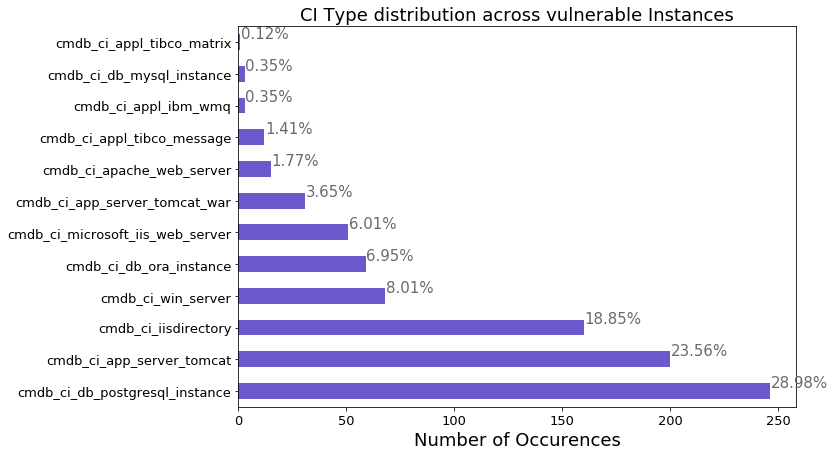

In [213]:
print CI_Class_distribution
drawchart(df_ci_typpe_corelation, 'CI_Class_Name', "CI Type distribution across vulnerable Instances", "Number of Occurences",'barh')